# **Bank Churn Prediction**

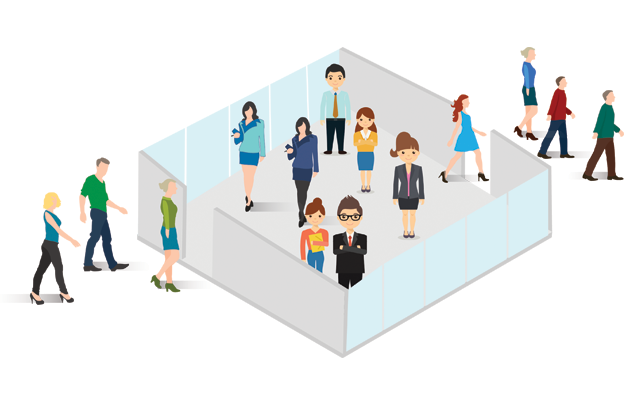

<p><strong>Author: <a href="https://www.linkedin.com/in/divya2004" target="_blank">Divya B Gowda</a></strong></p>


<h2>🌐 Connect with Me</h2>
<p>
  <a href="https://www.kaggle.com/divyabgowda23" target="_blank"><strong>Kaggle</strong></a> | 
  <a href="https://www.linkedin.com/in/divya2004" target="_blank"><strong>LinkedIn</strong></a> | 
  <a href="https://github.com/DivyaBGowda484" target="_blank"><strong>GitHub</strong></a>
</p>

<h3>💬 Contact Me</h3>
<p>Email: <a href="mailto:divyabgowda034@gmail.com">divyabgowda034@gmail.com</a><br></p>

<h3>🔗 Let’s Collaborate</h3>
<p>I'm always open to queries, collaborations, and discussions. Let's build something amazing together!</p>



<h2>Meta-Data (About Dataset) 🔍</h2>

<h3>Context:</h3>
<p>
This dataset is designed to predict customer churn in the banking industry. Customer churn prediction aims to predict whether a customer will leave (churn) or stay with the company(Bank). This is a common and valuable problem for businesses, as retaining customers is often cheaper than acquiring new ones.It contains essential information about customers who either left the bank or continued to stay. Below is a breakdown of the dataset's attributes:
</p>

**Goal:** To predict customer churn based on historical data (customer behavior, services used, etc.).

<h3>Column Descriptions:</h3>
<table>
  <tr>
    <th>Attribute</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>👤 <strong>Customer ID</strong></td>
    <td>A unique identifier for each customer.</td>
  </tr>
  <tr>
    <td>🔠 <strong>Surname</strong></td>
    <td>The customer's last name.</td>
  </tr>
  <tr>
    <td>📈 <strong>Credit Score</strong></td>
    <td>A numerical value representing the customer's credit score.</td>
  </tr>
  <tr>
    <td>🌍 <strong>Geography</strong></td>
    <td>The country where the customer resides (France, Spain, or Germany).</td>
  </tr>
  <tr>
    <td>🚻 <strong>Gender</strong></td>
    <td>The customer's gender (Male or Female).</td>
  </tr>
  <tr>
    <td>🎂 <strong>Age</strong></td>
    <td>The customer's age.</td>
  </tr>
  <tr>
    <td>📆 <strong>Tenure</strong></td>
    <td>The number of years the customer has been with the bank.</td>
  </tr>
  <tr>
    <td>💰 <strong>Balance</strong></td>
    <td>The customer's account balance.</td>
  </tr>
  <tr>
    <td>📦 <strong>NumOfProducts</strong></td>
    <td>The number of bank products the customer uses (e.g., savings account, credit card).</td>
  </tr>
  <tr>
    <td>💳 <strong>HasCrCard</strong></td>
    <td>Whether the customer has a credit card (1 = yes, 0 = no).</td>
  </tr>
  <tr>
    <td>✅ <strong>IsActiveMember</strong></td>
    <td>Whether the customer is an active member (1 = yes, 0 = no).</td>
  </tr>
  <tr>
    <td>💵 <strong>EstimatedSalary</strong></td>
    <td>The estimated salary of the customer.</td>
  </tr>
  <tr>
    <td>🚪 <strong>Exited</strong></td>
    <td>Whether the customer has churned (1 = yes, 0 = no).</td>
  </tr>
</table>


**Observations:** As this has labels This Prediction should be done using Supervised Techniques

**Type of Problem:** Binary classification (churn or not).

# IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# IMPORTING THE DATASET

In [2]:
#loading training data

train_data = pd.read_csv("train.csv")
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
# loading test data

test_data = pd.read_csv("test.csv")
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


# UNDERSTANDING THE DATA

In [4]:
train_data.shape

(165034, 14)

In [5]:
test_data.shape

(110023, 13)

In [6]:
# Checking for Data types

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


**Observations:**

Categorical Features:
1. Surname
2. Geography
3. Gender

Numerical Features:
1. id
2. CustomerId
3. CreditScore
4. Age
5. Tenure
6. Balance
7. NumOfProducts
8. HasCrCard
9. IsActiveMember
10. EstimatedSalary

Taget Feature:
1. Exited

In [8]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
test_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


**Observation:** As this is an imbalanced dataset. Let us do oversampling 

# EDA

<Figure size 600x600 with 0 Axes>

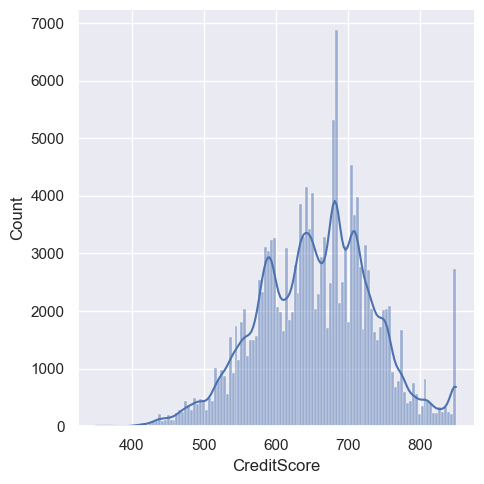

In [10]:
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(train_data['CreditScore'], kde=True)
plt.show()

**Observation:** mainly credit score lies in the range of 650-720 but many customers also have 850 which is very good and the highest range in credit score

<Figure size 600x600 with 0 Axes>

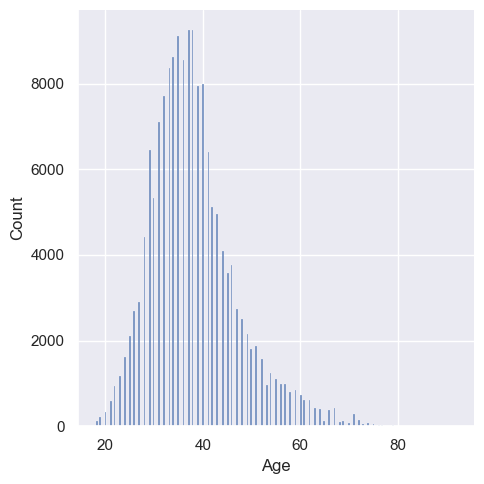

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(train_data['Age'])
plt.show()

**Observation:** Mainly customers are ranged between 30-45years

<Figure size 600x600 with 0 Axes>

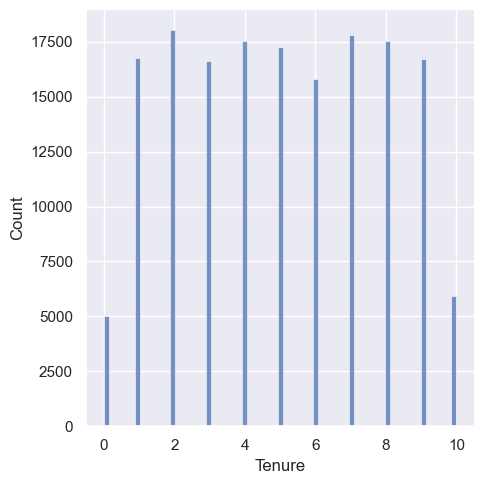

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(train_data['Tenure'])
plt.show()

**Observations:** Many people have decided to keep thier tenure for 1-9 years but significantly less for years 0 and 10

<Figure size 600x600 with 0 Axes>

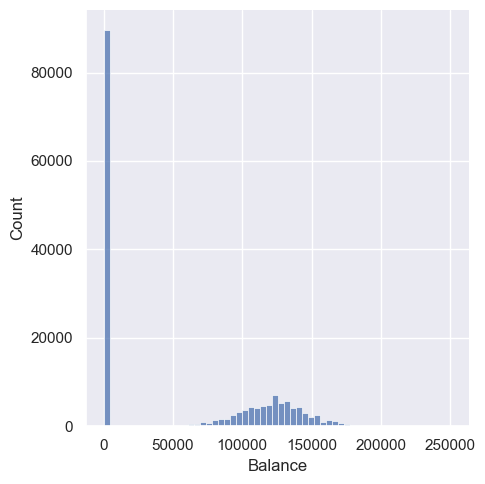

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(train_data['Balance'])
plt.show()

**Observations:** many people have thier bank balance in range of 70,000 - 1,70,000 but significant people have thier bank balance as 0 which may indicate they are likely not using thier account so might churn from this bank

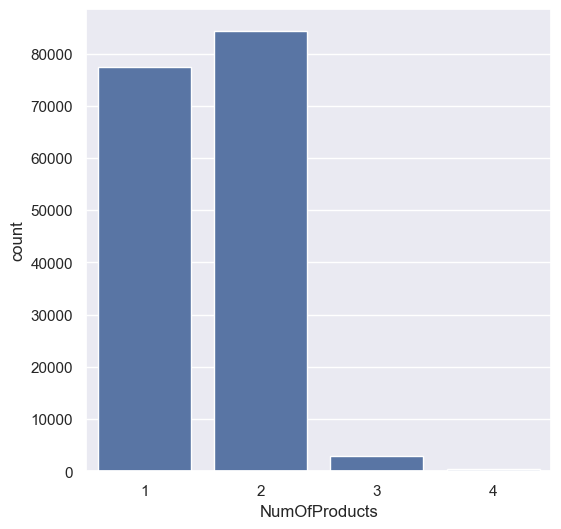

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='NumOfProducts', data=train_data)
plt.show()

**Observations:** Almost all people have 1 or 2 products but some people also have 3 products 

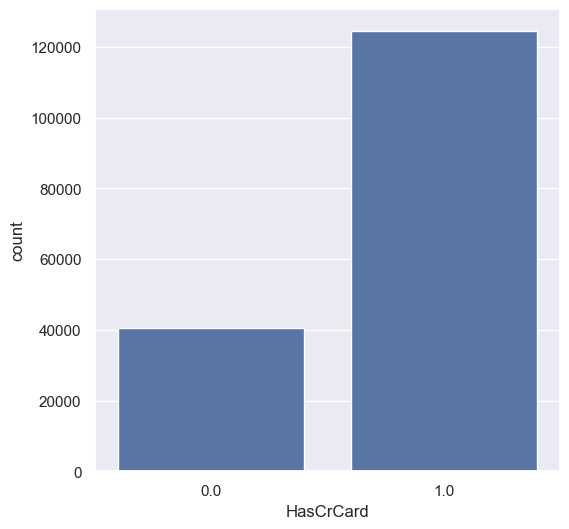

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='HasCrCard', data=train_data)
plt.show()

**Observations:** over 1,20,000 customers have credit cards but around 40,000 customers don't have credit cards

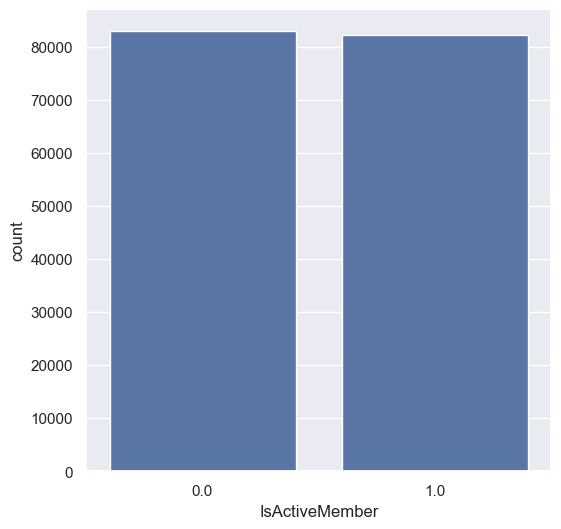

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='IsActiveMember', data=train_data)
plt.show()

**Observations:** This shows that there are almost equal number of customers who are active and who are not active

<Figure size 600x600 with 0 Axes>

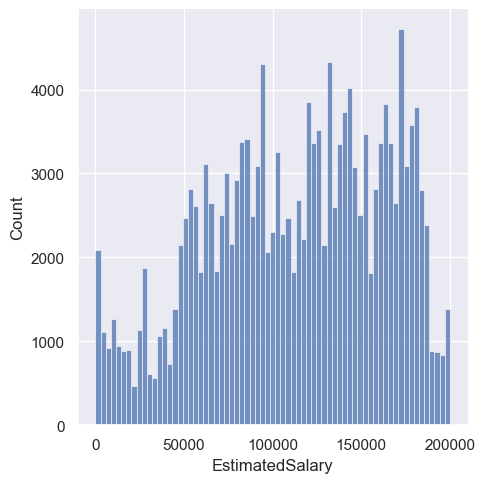

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(train_data['EstimatedSalary'])
plt.show()

# DATA PRE-PROCESSING

In [18]:
#Checking for missing values

train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observation:** There are no Missing values

In [19]:
test_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [20]:
# Checking for duplicates

train_data.duplicated().sum()

0

In [21]:
test_data.duplicated().sum()

0

In [22]:
train_data.head(1)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


In [23]:
#Removing unwanted columns in training data

train_data.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [24]:
#Removing unwanted columns in testing data

test_data.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
test_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [25]:
train_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [26]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# DATA TRANSFORMATION

## ENCODING CATEGORICAL VARIABLES

In [27]:
# Apply One-Hot Encoding
# Separate the target variable 'Exited' from the training data
y_train = train_data['Exited']
train_features = train_data.drop('Exited', axis=1)

# Apply One-Hot Encoding to categorical features
train_encoded = pd.get_dummies(train_features[['Geography', 'Gender']], drop_first=True)
test_encoded = pd.get_dummies(test_data[['Geography', 'Gender']], drop_first=True)

# Ensure test set has the same columns as train set
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

## STANDADIZING THE DATASET

In [28]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features
numerical_features_train = train_features[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
numerical_features_test = test_data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# Apply StandardScaler to the numerical features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(numerical_features_train)
test_scaled = scaler.transform(numerical_features_test)

# Combine the scaled numerical features with the encoded categorical features
final_train_data = np.concatenate([train_scaled, train_encoded.values], axis=1)
final_test_data = np.concatenate([test_scaled, test_encoded.values], axis=1)

# Convert back to DataFrame for easier interpretation
final_train_df = pd.DataFrame(final_train_data, columns=['CreditScore_scaled', 'Age_scaled', 'Tenure_scaled', 'Balance_scaled', 'NumOfProducts_scaled', 'HasCrCard_scaled', 'IsActiveMember_scaled', 'EstimatedSalary_scaled'] + list(train_encoded.columns))
final_test_df = pd.DataFrame(final_test_data, columns=['CreditScore_scaled', 'Age_scaled', 'Tenure_scaled', 'Balance_scaled', 'NumOfProducts_scaled', 'HasCrCard_scaled', 'IsActiveMember_scaled', 'EstimatedSalary_scaled'] + list(test_encoded.columns))

# Add the target column 'Exited' back to the final_train_df
final_train_df['Exited'] = y_train

# SPLITTING THE DATA

In [29]:
# Splitting features and target

X_train = final_train_df.drop('Exited', axis=1)
y_train = final_train_df['Exited']

In [30]:
print(X_train.head())

   CreditScore_scaled  Age_scaled  Tenure_scaled  Balance_scaled  \
0            0.144135   -0.578074      -0.719973       -0.883163   
1           -0.367706   -0.578074      -1.432694       -0.883163   
2            0.268974    0.211354       1.774548       -0.883163   
3           -0.941966   -0.465299      -1.076334        1.486918   
4            0.743362   -0.578074      -0.007253       -0.883163   

   NumOfProducts_scaled  HasCrCard_scaled  IsActiveMember_scaled  \
0              0.814298          0.571263               -0.99555   
1              0.814298          0.571263                1.00447   
2              0.814298          0.571263               -0.99555   
3             -1.013348          0.571263                1.00447   
4              0.814298          0.571263                1.00447   

   EstimatedSalary_scaled  Geography_Germany  Geography_Spain  Gender_Male  
0                1.369486                0.0              0.0          1.0  
1               -1.254085   

In [31]:
print(y_train.head())

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64


In [32]:
X_test = final_test_df.copy()

In [33]:
X_train.head()

,CreditScore_scaled,Age_scaled,Tenure_scaled,Balance_scaled,NumOfProducts_scaled,HasCrCard_scaled,IsActiveMember_scaled,EstimatedSalary_scaled,Geography_Germany,Geography_Spain,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.0,0.0,1.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.0,0.0,1.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0.0,0.0,1.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0.0,0.0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0.0,1.0,1.0


In [34]:
X_test.head()

,CreditScore_scaled,Age_scaled,Tenure_scaled,Balance_scaled,NumOfProducts_scaled,HasCrCard_scaled,IsActiveMember_scaled,EstimatedSalary_scaled,Geography_Germany,Geography_Spain,Gender_Male
0,-0.879546,-1.705829,-1.076334,-0.883163,0.814298,-1.750507,1.00447,0.962404,0.0,0.0,0.0
1,0.331393,0.888007,-1.076334,-0.883163,-1.013348,0.571263,-0.99555,-0.795852,0.0,0.0,0.0
2,-0.005672,-0.465299,0.705467,-0.883163,0.814298,0.571263,-0.99555,0.523083,0.0,0.0,0.0
3,0.306425,-0.239748,1.061827,-0.883163,-1.013348,0.571263,-0.99555,0.026977,0.0,0.0,1.0
4,1.192783,-0.014197,1.774548,1.047249,-1.013348,0.571263,-0.99555,0.533997,1.0,0.0,1.0


# FEATURE SELECTION USING PCA

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# MODEL BUILDING

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [37]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
y_pred_logreg = logreg.predict(X_test_pca)

In [38]:
X_train_small = X_train_pca[:5000]  
y_train_small = y_train[:5000]

In [39]:
# SVM

svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_small, y_train_small)
y_pred_svm = svm_model.predict(X_test_pca)

In [40]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)

In [41]:
#!pip install lightgbm

In [42]:
from sklearn.model_selection import cross_val_score

# LightGBM Parameters
import lightgbm as lgb

lgbParams = {'n_estimators': 1000,
             'max_depth': 25, 
             'learning_rate': 0.025,
             'min_child_weight': 3.43,
             'min_child_samples': 216, 
             'subsample': 0.782,
             'subsample_freq': 4, 
             'colsample_bytree': 0.29, 
             'num_leaves': 21,
             'verbose':-1}

lgb_model = lgb.LGBMClassifier(**lgbParams)

# Use accuracy as the scoring metric
lgb_cv_scores = cross_val_score(lgb_model, X_train_pca, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", lgb_cv_scores)
print("Mean Accuracy:", lgb_cv_scores.mean())

Cross-validation accuracy scores: [0.86427122 0.86148393 0.8634835  0.86130215 0.86384294]
Mean Accuracy: 0.8628767464049302


In [43]:
#!pip install catboost

In [44]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Initialize CatBoostClassifier with custom parameters
cat_model = CatBoostClassifier(
    learning_rate=0.022,
    iterations=1000,
    verbose=False
)

# Perform cross-validation using accuracy as the scoring metric
catboost_cv_scores = cross_val_score(cat_model, X_train_pca, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", catboost_cv_scores)
print("Mean Accuracy:", catboost_cv_scores.mean())

Cross-validation accuracy scores: [0.86542249 0.86239283 0.86496804 0.86272609 0.86393383]
Mean Accuracy: 0.8638886535209513


In [45]:
#!pip install xgboost

In [46]:
# XGBoost Parameters

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score

# XGBoost Parameters
xgb_params = {
    'max_depth': 6,
    'learning_rate': 0.01,
    'n_estimators': 1000,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'objective': 'binary:logistic',
    'use_label_encoder': False,
    'nthread': -1,
    'random_state': 42
}

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(**xgb_params)

# Perform cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use accuracy as the scoring metric
xgb_cv_scores = cross_val_score(xgb_model, X_train_pca, y_train, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())


C:\Users\Divya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:56:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Divya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:56:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Divya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:56:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Divya\anaconda3\Lib\site-packages\

Cross-validation accuracy scores: [0.86215045 0.86160511 0.86463477 0.86581634 0.8642974 ]
Mean Accuracy: 0.8637008167806858


# CROSS VALIDATION 

In [47]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_model, X_train_pca, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(f'Logistic Regression CV Accuracy: {log_scores.mean():.4f}')

# SVM (with linear kernel for speed)
svm_model = SVC(kernel='linear', max_iter = 1000)
svm_scores = cross_val_score(svm_model, X_train_pca, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(f'SVM CV Accuracy: {svm_scores.mean():.4f}')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(f'Random Forest CV Accuracy: {rf_scores.mean():.4f}')

Logistic Regression CV Accuracy: 0.8258
SVM CV Accuracy: 0.5043
Random Forest CV Accuracy: 0.8615


**Observations:** We can observe that CatBoost is giving highest accuracy of 86.79% where as SVM is giving lowest accuracy of 50.43%

# TEST VALIDATION

In [48]:
# Fit the model to your training data
cat_model.fit(X_train_pca, y_train)

# After fitting, evaluate the model on the training data
train_accuracy = cat_model.score(X_train_pca, y_train)
print(f'CatBoost Training Accuracy: {train_accuracy:.4f}')

# Predict on the test set
y_test_pred = cat_model.predict(X_test_pca)

CatBoost Training Accuracy: 0.8679


# OPTIMIZING MODEL 

**USING HYPERPARAMETER**


In [49]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize CatBoost Classifier with optimized parameters
cat_model = CatBoostClassifier(
    eval_metric='Accuracy',
    iterations=500,  # Fewer iterations
    early_stopping_rounds=10,  # Stricter early stopping
    grow_policy='SymmetricTree',  # Valid grow policy option
    verbose=False,
    random_state=42
)

# Define reduced hyperparameter search space
param_dist = {
    'depth': [4, 6],  # Only two depths for quicker optimization
    'learning_rate': [0.05, 0.01, 0.03, 0.1],  # Focus on key learning rates
    'l2_leaf_reg': [1, 3],  # Minimal l2 regularization tuning
    'bagging_temperature': [0.2, 0.5, 0.7],  # Controlling overfitting
    'rsm': [0.8, 1.0],  # Fraction of features used
}

# Use Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    scoring='accuracy',
    n_iter=4,  # Only 4 combinations to try
    cv=5,       
    random_state=42,
    verbose=1,
    n_jobs=-1   # Use all available cores
)

# Fit the model
random_search.fit(X_train_pca, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Best model
best_cat_model = random_search.best_estimator_

# After fitting, evaluate the model on the training data
train_accuracy = best_cat_model.score(X_train_pca, y_train)
print(f'Optimized CatBoost Training Accuracy: {train_accuracy:.4f}')

# Predict on the test set
y_test_pred = best_cat_model.predict(X_test_pca)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'rsm': 0.8, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'depth': 6, 'bagging_temperature': 0.7}
Optimized CatBoost Training Accuracy: 0.8684


**Observation:** Final CatBoost Model's accuracy is: 86.84%

# SUBMISSION FILE

In [50]:
test_data = pd.read_csv('test.csv')

In [51]:

submission = pd.DataFrame({
    'id': test_data['id'],         
    'Prediction': y_test_pred  
})
submission.to_csv('submission.csv', index=False)


# CREATING A PREDICTIVE SYSTEM

In [52]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [53]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from catboost import CatBoostClassifier

# Load dataset
train = pd.read_csv('train.csv')

# Dropping unnecessary columns
train.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Defining categorical and numerical columns
categorical_columns = ['Geography', 'Gender']
numerical_columns = [col for col in train.columns if col not in categorical_columns + ['Exited']]

# Encoding categorical features (fit only on train data)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(train[categorical_columns])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())

# Combining numerical and encoded categorical features
X_train_numerical = train[numerical_columns].reset_index(drop=True)
X_train = pd.concat([X_train_numerical, X_train_encoded_df], axis=1)

# Feature scaling (fit only on train data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Defining the target variable
y_train = train['Exited']

# Model training - CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
catboost_model.fit(X_train_scaled, y_train)

# Function to make predictions for a single customer input
def predict_single_customer(data):
    """Predicts whether a single customer will exit or not."""
    
    # Encoding categorical columns (use the encoder fitted on train data)
    data_encoded = encoder.transform(data[categorical_columns])
    data_encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out())

    # Extract numerical columns
    X_new_numerical = data[numerical_columns].reset_index(drop=True)

    # Merge numerical and encoded categorical columns
    X_new = pd.concat([X_new_numerical, data_encoded_df], axis=1)

    # Feature scaling (use the scaler fitted on train data)
    X_new_scaled = scaler.transform(X_new)

    # Prediction
    prediction = catboost_model.predict(X_new_scaled)

    # Output result
    return "Exited" if prediction[0] == 1 else "Did Not Exit"

# Example usage:
# Input a new customer's data (without 'id', 'CustomerId', 'Surname')
new_customer = pd.DataFrame({
    'CreditScore': [593],
    'Geography': ['France'],
    'Gender': ['Male'],
    'Age': [38.0],
    'Tenure': [7],
    'Balance': [0.0],
    'NumOfProducts': [2],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [121592.5]
})

# Predict churn for the new customer
result = predict_single_customer(new_customer)
print(f"The customer {result}")


The customer Did Not Exit


# CREATING A PIPELINE

In [54]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Load dataset
data = pd.read_csv('train.csv')

# Drop unnecessary columns
data.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True, errors='ignore')

# Separate target and features
y_train = data['Exited']
X_train = data.drop('Exited', axis=1)

# Define numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Preprocessor: scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop=None), categorical_features)  # Avoid dropping categories
    ]
)

# Initialize CatBoostClassifier
model = CatBoostClassifier(verbose=0, random_seed=42)

# Create a pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Define hyperparameter grid
param_grid = {
    'classifier__iterations': [500],  
    'classifier__depth': [4, 6, 8],       
    'classifier__learning_rate': [0.05, 0.01, 0.1], 
    'classifier__l2_leaf_reg': [1, 3],          
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the pipeline and perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Function to make a prediction for a single customer
def predict_single_customer(data_dict):
    """Predicts churn (Exited/Not Exited) for a single customer."""
    single_customer = pd.DataFrame([data_dict])  # Convert dict to DataFrame
    prediction = best_model.predict(single_customer)
    return "Exited" if prediction[0] == 1 else "Did Not Exit"

# Example usage:
new_customer = {
    'CreditScore': 650,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 5,
    'Balance': 120000.0,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 75000.0
}

# Predict churn for the new customer
result = predict_single_customer(new_customer)
print(f"The customer {result}")


Best Hyperparameters: {'classifier__depth': 6, 'classifier__iterations': 500, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.05}


# SAVING THE TRAINED MODEL

In [55]:
import pickle

In [56]:
filename = "trained_pipeline.sav"
pickle.dump(best_model, open(filename, 'wb'))

In [57]:
# loading saved model
loaded_model = pickle.load(open('trained_pipeline.sav', 'rb'))

In [58]:
import pickle
import pandas as pd

# Load the saved model pipeline
try:
    with open('trained_pipeline.sav', 'rb') as file:
        loaded_model = pickle.load(file)
except FileNotFoundError:
    print("Error: Model file not found. Please check the filename and path.")
    exit()

# Example input data (single customer)
new_data = pd.DataFrame({
    'CreditScore': [700], 
    'Geography': ['Germany'], 
    'Gender': ['Female'], 
    'Age': [35], 
    'Tenure': [5], 
    'Balance': [75000], 
    'NumOfProducts': [1], 
    'HasCrCard': [1], 
    'IsActiveMember': [0], 
    'EstimatedSalary': [90000]
})

# Ensure categorical values exist in training data categories (if not handled)
try:
    prediction = loaded_model.predict(new_data)
    print("Predicted Class:", prediction[0])
    
    # Output result
    if prediction[0] == 1:
        print("Exited")
    else:
        print("Did Not Exit")
except Exception as e:
    print(f"Error during prediction: {e}")


Predicted Class: [0]
Did Not Exit
